In [ ]:
!git clone https://github.com/iabufarha/ArSarcasm.git

Cloning into 'ArSarcasm'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 82 (delta 36), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (82/82), done.


In [ ]:
import pandas as pd
train = pd.read_csv('/content/ArSarcasm/dataset/ArSarcasm_train.csv')

In [ ]:
test=pd.read_csv('/content/ArSarcasm/dataset/ArSarcasm_test.csv')

In [ ]:
# Cleaning Data
!pip install alphabet_detector
import re
from alphabet_detector import AlphabetDetector
import string
from bs4 import BeautifulSoup

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)


def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text


def remove_punctuation(s):
    my_punctuations = string.punctuation + "،" + "؛" + "؟" + "«" + "»"
    translator = str.maketrans('', '', my_punctuations)
    return s.translate(translator)


def remove_punctuation2(s): # replace punctuation with space
    my_punctuations = string.punctuation + "،" + "؛" + "؟" + "«" + "»"
    replace_table = str.maketrans(my_punctuations,  ' '*len(my_punctuations))
    return s.translate(replace_table)


def html2text(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()


def remove_links(text):
    # return re.sub(r'\s*(?:https?://)?www\.\S*\.[A-Za-z]{2,5}\s*', ' ', text, flags=re.MULTILINE).strip()
    # return re.sub(r'^https?:\/\/.*[\r\n]*', '', clean_text, flags=re.MULTILINE)
    return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)


def remove_empty_lines(text):
    lines = [s.rstrip() for s in text.split("\n") if s.rstrip()]
    return '\n'.join(lines)


def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1\1', text)  # keep 2 repeat


def keep_only_arabic(text):
    ad = AlphabetDetector()
    clean_lines = list()
    for line in text.splitlines():
        clean_line = list()
        for word in line.split():
            if len(word) > 1:
                if ad.is_arabic(word):
                    if word.isalpha():
                        clean_line.append(word)
        clean_lines.append(' '.join(clean_line))
    return '\n'.join(clean_lines)


def clean_doc(text):
    text = html2text(text)
  
    text = text.replace('(', ' ')
    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text) # remove numbers
    text = text.replace(')', ' ')
    clean_text = remove_links(text)
    clean_text = remove_diacritics(clean_text)
    clean_text = remove_punctuation2(clean_text)
    clean_text = keep_only_arabic(clean_text)
    clean_text = remove_repeating_char(clean_text)
    clean_text = remove_empty_lines(clean_text)
    return clean_text


  Created wheel for alphabet-detector: filename=alphabet_detector-0.0.7-cp36-none-any.whl size=2449 sha256=9cfb4a93d6bdd84af17fa41544ea21cf5224a4cca3319e193c951ef4e485e6ac
  Stored in directory: /root/.cache/pip/wheels/75/a7/c3/faf515469622e565475fc96983418ba6e03f6a0f73755cd892
Successfully built alphabet-detector


In [ ]:
train.columns

Index(['dialect', 'sarcasm', 'sentiment', 'original_sentiment', 'tweet',
       'source'],
      dtype='object')

In [ ]:
train['tweet']= train['tweet'].apply(clean_doc)

In [ ]:
test['tweet']= test['tweet'].apply(clean_doc)

In [ ]:
X_train = train['tweet'].astype(str).values
y_train = train['sarcasm'].values


In [ ]:


X_val = test['tweet'].astype(str).values
y_val = test['sarcasm'].values


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding



import nltk
import nltk as nlp
import string
import re


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
pipe = Pipeline([
                 ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(X_train, y_train)

prediction = model.predict(X_val)
print('=================')

print('====== Logistic Regression Model Performance ===========')

print("Logistic Regression accuracy: {}%".format(round(accuracy_score(y_val, prediction)*100,2)))
print('=================')


====== Logistic Regression Model Performance ===========
Logistic Regression accuracy: 83.98%


In [ ]:
pipe = Pipeline([
                 ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

model = pipe.fit(X_train, y_train)

prediction = model.predict(X_val)
print('=================')

print('====== LinearSVC Model Performance ===========')

print("Logistic Regression accuracy: {}%".format(round(accuracy_score(y_val, prediction)*100,2)))
print('=================')


====== LinearSVC Model Performance ===========
Logistic Regression accuracy: 84.88%


In [ ]:
labels={ 'negative':1,'positive':2 ,'neutral':0 }

# %% [code]
train['sentiment'].replace(labels,inplace=True)
test['sentiment'].replace(labels,inplace=True)


In [ ]:
labels={True:0,False:1 }

# %% [code]
train['sarcasm'].replace(labels,inplace=True)
test['sarcasm'].replace(labels,inplace=True)


In [ ]:
train.head()

,dialect,sarcasm,sentiment,original_sentiment,tweet,source
0,gulf,1,1,negative,نصيحه ما عمرك اتنزل لعبة سوبر ماريو مش زي ما ك...,semeval
1,msa,1,0,positive,نادين نسيب نجيم ماري كلير ملكة الصحراء,semeval
2,egypt,1,0,neutral,اتوقع انه بيستمر,semeval
3,levant,0,0,negative,يعني بموافقتنا لأن دمشق صايرة موسكو,semeval
4,msa,1,0,negative,قائد في الحرس يعترف بفقدان السيطرة الأمنية في ...,semeval


In [ ]:
from keras.preprocessing import text, sequence


In [ ]:
import keras
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Bidirectional,LSTM,Flatten,Dense
from keras.layers.embeddings import Embedding
from keras.models import Sequential


max_num_words = 40000
max_length = 150
tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 33382 unique tokens.


In [ ]:
tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(list(X_train))
list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(X_val)
X_t = pad_sequences(list_tokenized_train, maxlen=max_length)
X_te = pad_sequences(list_tokenized_test, maxlen=max_length)


In [ ]:
import keras
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [ ]:
y_test= pd.get_dummies(y_val)
y_test

,0,1,2
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2105,1,0,0
2106,1,0,0
2107,1,0,0
2108,0,0,1


In [ ]:
Y = pd.get_dummies(y_train)


In [ ]:
import keras
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Bidirectional,LSTM,Dense
from keras.layers.embeddings import Embedding
from keras.models import Sequential
model = Sequential()
 
model.add(Embedding(40000, 100, input_length=150))


model.add(LSTM(units=250, return_sequences=True, dropout=0.1, recurrent_dropout=0.2))
  
model.add(Flatten())
model.add(Dense(400, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history= model.fit(X_t, y_train, validation_data=(X_te, y_val), epochs=15,batch_size=100)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8437 samples, validate on 2110 samples
Epoch 1/15
8437/8437 [==============================] - 27s 3ms/step - loss: 0.4126 - accuracy: 0.8431 - val_loss: 0.3707 - val_accuracy: 0.8412
Epoch 2/15
8437/8437 [==============================] - 25s 3ms/step - loss: 0.1754 - accuracy: 0.9317 - val_loss: 0.4989 - val_accuracy: 0.8379
Epoch 3/15
8437/8437 [==============================] - 25s 3ms/step - loss: 0.0542 - accuracy: 0.9835 - val_loss: 0.6243 - val_accuracy: 0.8379
Epoch 4/15
8437/8437 [==============================] - 25s 3ms/step - loss: 0.0367 - accuracy: 0.9912 - val_loss: 0.6902 - val_accuracy: 0.8379
Epoch 5/15
8437/8437 [==============================] - 25s 3ms/step - loss: 0.0315 - accuracy: 0.9912 - val_loss: 0.7271 - val_accuracy: 0.8417
Epoch 6/15
8437/8437 [==============================] - 25s 3ms/step - loss: 0.0268 - accuracy: 0.9928 - val_loss: 0.7332 - val_accuracy: 0.8313
Epoch 7/15
8437/8437 [==============================] - 25s 3ms/step - loss: 0.024

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


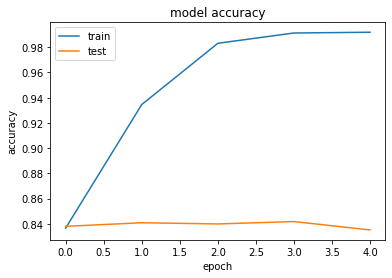

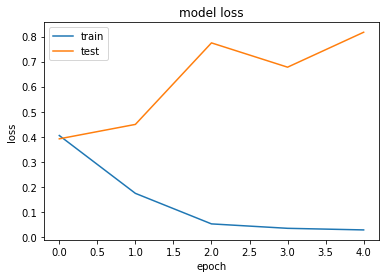

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
train.sarcasm.value_counts()

False    7100
True     1337
Name: sarcasm, dtype: int64

In [ ]:
y_val

,0,1,2
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2105,1,0,0
2106,1,0,0
2107,1,0,0
2108,0,0,1
